In [1]:
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,matthews_corrcoef,classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convolutional Neural Network

In [2]:
# verileri 0-1 değeri arasına sıkıştırdık
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# veriyi eğitim ve test okuyucu olarak yarattık
train_generator = train_datagen.flow_from_directory(
    f'C:/Users/YekHam/YapayZeka_Proje/Tomato disease/train',
    target_size=(224, 224),
    batch_size=32, 
    class_mode='categorical',
    shuffle=True) 

test_generator = test_datagen.flow_from_directory(
    f'C:/Users/YekHam/YapayZeka_Proje/Tomato disease/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# verideki label isimleri
labels = list(train_generator.class_indices.keys())
labels

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[224, 224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[224, 224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size = 3, activation='relu',input_shape=[224, 224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
# Label sayısı kadar units verildi
model.add(tf.keras.layers.Dense(units=len(labels),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [4]:
#5.epoch'tan sonra val_accuracy için overfitting durumu yaşanıyor
history=model.fit(x = train_generator,validation_data = test_generator,epochs=5)

Epoch 1/5
574/574 [==============================] - 254s 441ms/step - loss: 0.8783 - accuracy: 0.6941 - val_loss: 0.5042 - val_accuracy: 0.8255
Epoch 2/5
574/574 [==============================] - 262s 456ms/step - loss: 0.3638 - accuracy: 0.8783 - val_loss: 0.3792 - val_accuracy: 0.8639
Epoch 3/5
574/574 [==============================] - 291s 507ms/step - loss: 0.2153 - accuracy: 0.9258 - val_loss: 0.3419 - val_accuracy: 0.8814
Epoch 4/5
574/574 [==============================] - 287s 499ms/step - loss: 0.1465 - accuracy: 0.9476 - val_loss: 0.3053 - val_accuracy: 0.8964
Epoch 5/5
574/574 [==============================] - 272s 475ms/step - loss: 0.0974 - accuracy: 0.9658 - val_loss: 0.2665 - val_accuracy: 0.9125


In [5]:
#loss eğrimizi çizmemimizi sağlayan fonksiyon
def plot_loss_curve(history): 
    hist = history.history
    plt.plot(hist['loss'], label='train loss')
    plt.plot(hist['val_loss'], label='validation loss')
    plt.legend()
    plt.show()
#Başarım eğrimizi çizmemizi sağlayan fonksiyon
def plot_accuracy_curve(history):
    hist = history.history
    plt.plot(hist['accuracy'], label='train acc')
    plt.plot(hist['val_accuracy'], label='validation acc')
    plt.legend()
    plt.show()

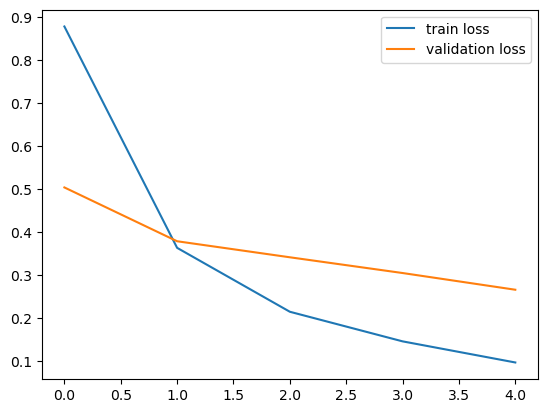

In [6]:
plot_loss_curve(history)

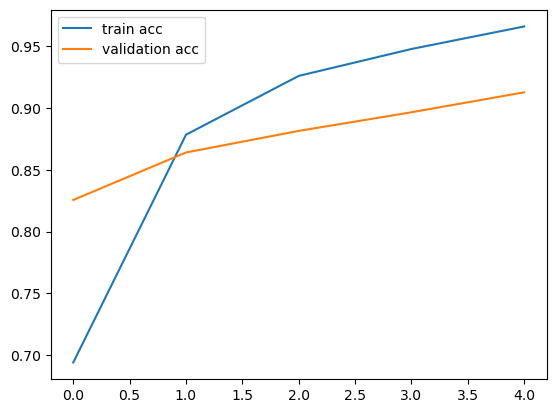

In [7]:
plot_accuracy_curve(history)

In [8]:
# test tahminlerini alıp metriklerle değerlendirme
cnnpred = np.argmax(model.predict(test_generator),axis=1)
test_actual =test_generator.classes

144/144 [==============================] - 18s 124ms/step


In [9]:
#Doğruluk değerimiz
cnn_acc=round(accuracy_score(test_actual,cnnpred),4)*100
print(cnn_acc)

91.25


In [10]:
#MCC değerimiz
print(matthews_corrcoef(test_actual,cnnpred))

0.9032218928620827


In [11]:
#Precision,Recall,F1-score değerlerimiz
print(classification_report(cnnpred,test_actual,target_names=labels))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.95      0.95       422
                        Tomato___Early_blight       0.90      0.84      0.87       518
                         Tomato___Late_blight       0.89      0.86      0.87       479
                           Tomato___Leaf_Mold       0.86      0.96      0.91       422
                  Tomato___Septoria_leaf_spot       0.87      0.89      0.88       426
Tomato___Spider_mites Two-spotted_spider_mite       0.96      0.83      0.89       502
                         Tomato___Target_Spot       0.78      0.96      0.86       369
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.94      0.96       511
                 Tomato___Tomato_mosaic_virus       1.00      0.95      0.97       470
                             Tomato___healthy       0.95      0.98      0.96       466

                                     accu

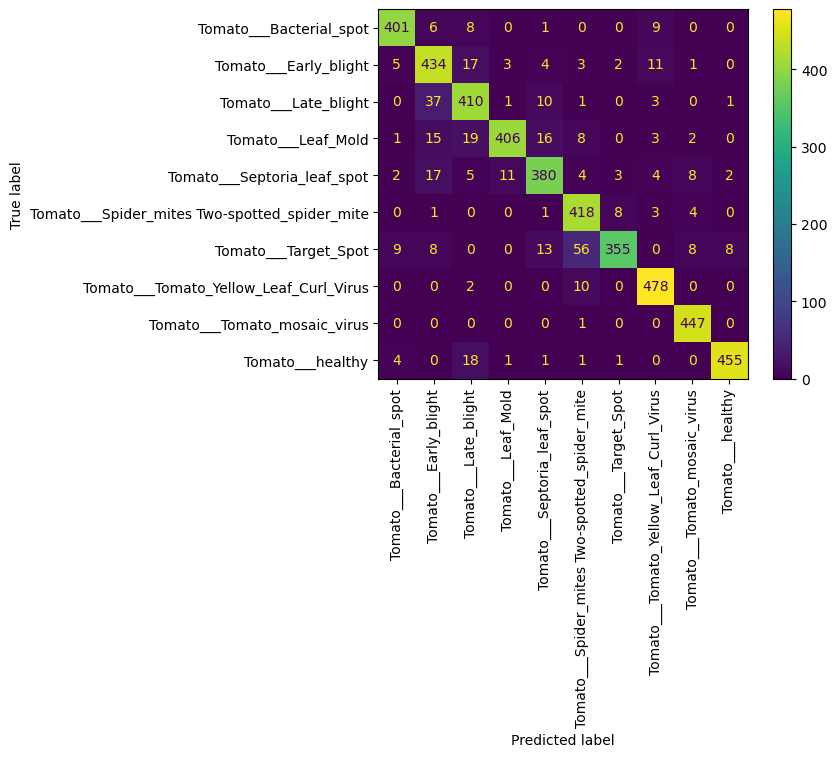

In [12]:
#Karmaşılık matriksi
cm=confusion_matrix(test_actual,cnnpred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Convolutional Neural Network Modelimizi kullanarak tahmin

In [13]:
from keras_preprocessing.image import load_img
# tekli veri ile tahminleme
img_path = f'C:/Users/YekHam/YapayZeka_Proje/Tomato disease/validation/Tomato___Late_blight/2aec9930-0331-4e04-8bc0-5c00f373fbf3___GHLB2 Leaf 8993.JPG'
img = tf.keras.utils.load_img(img_path,target_size = (224,224))  # görseli okuyup 224x224 formata çeviriyoruz
img = tf.keras.utils.img_to_array(img) / 255 # pikselleri 0-255 aralığına sıkıştırıyoruz
img = np.expand_dims(img,axis=0) # 224x224x3 formatına getiriyoruz
prediction = model.predict(img) # model ile tahminlemesini yaptırıyoruz
labels[prediction.argmax()] # ait olduğu sınıfın ismini yazdırıyoruz

1/1 [==============================] - 0s 48ms/step


'Tomato___Late_blight'

In [14]:
#Modelimizi kaydediyoruz
model.save('YektaHamit_Pektaş_CNN_RF.h5')

CNN MODEL:
https://drive.google.com/file/d/1s9VEhdm04q54ldWK7WDfUtNzg4ofq-qq/view?usp=sharing

# Keras VGG16 Model

In [15]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
IMAGE_SIZE = [224, 224]

In [17]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
for layer in vgg16.layers:
    layer.trainable = False

In [19]:
x = Flatten()(vgg16.output)

In [20]:
prediction= Dense(len(labels), activation = 'softmax')(x)

In [21]:
modelvgg16 = Model(inputs= vgg16.input, outputs= prediction)

In [22]:
modelvgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelvgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
historyvgg=modelvgg16.fit(x = train_generator,validation_data = test_generator,epochs=5)

Epoch 1/5
574/574 [==============================] - 1613s 3s/step - loss: 0.6252 - accuracy: 0.7931 - val_loss: 0.3456 - val_accuracy: 0.8809
Epoch 2/5
574/574 [==============================] - 1563s 3s/step - loss: 0.2365 - accuracy: 0.9200 - val_loss: 0.3318 - val_accuracy: 0.8859
Epoch 3/5
574/574 [==============================] - 1480s 3s/step - loss: 0.1399 - accuracy: 0.9543 - val_loss: 0.3255 - val_accuracy: 0.8905
Epoch 4/5
574/574 [==============================] - 1462s 3s/step - loss: 0.0917 - accuracy: 0.9714 - val_loss: 0.3340 - val_accuracy: 0.8944
Epoch 5/5
574/574 [==============================] - 1459s 3s/step - loss: 0.0699 - accuracy: 0.9780 - val_loss: 0.2966 - val_accuracy: 0.9067


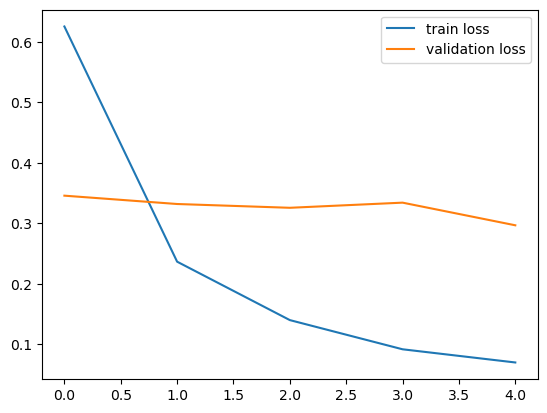

In [24]:
plot_loss_curve(historyvgg)

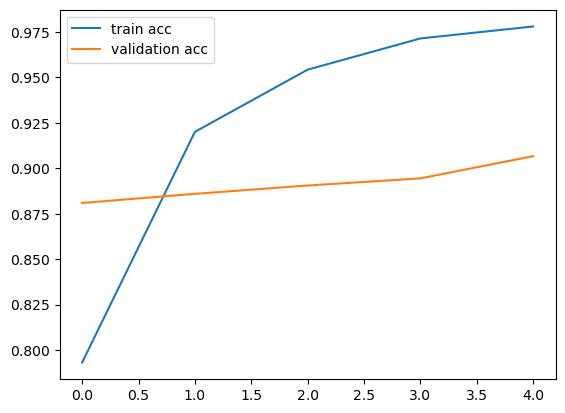

In [25]:
plot_accuracy_curve(historyvgg)

In [26]:
vgg16pred = np.argmax(modelvgg16.predict(test_generator),axis=1)
test_actual =test_generator.classes

144/144 [==============================] - 294s 2s/step


In [27]:
#Doğruluk değerimiz
vgg16_acc=round(accuracy_score(test_actual,vgg16pred),4)*100
print(vgg16_acc)

90.67


In [28]:
#MCC değerimiz
print(matthews_corrcoef(test_actual,cnnpred))

0.9032218928620827


In [29]:
#Precision,Recall,F1-score değerlerimiz
print(classification_report(cnnpred,test_actual,target_names=labels))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.95      0.95       422
                        Tomato___Early_blight       0.90      0.84      0.87       518
                         Tomato___Late_blight       0.89      0.86      0.87       479
                           Tomato___Leaf_Mold       0.86      0.96      0.91       422
                  Tomato___Septoria_leaf_spot       0.87      0.89      0.88       426
Tomato___Spider_mites Two-spotted_spider_mite       0.96      0.83      0.89       502
                         Tomato___Target_Spot       0.78      0.96      0.86       369
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.94      0.96       511
                 Tomato___Tomato_mosaic_virus       1.00      0.95      0.97       470
                             Tomato___healthy       0.95      0.98      0.96       466

                                     accu

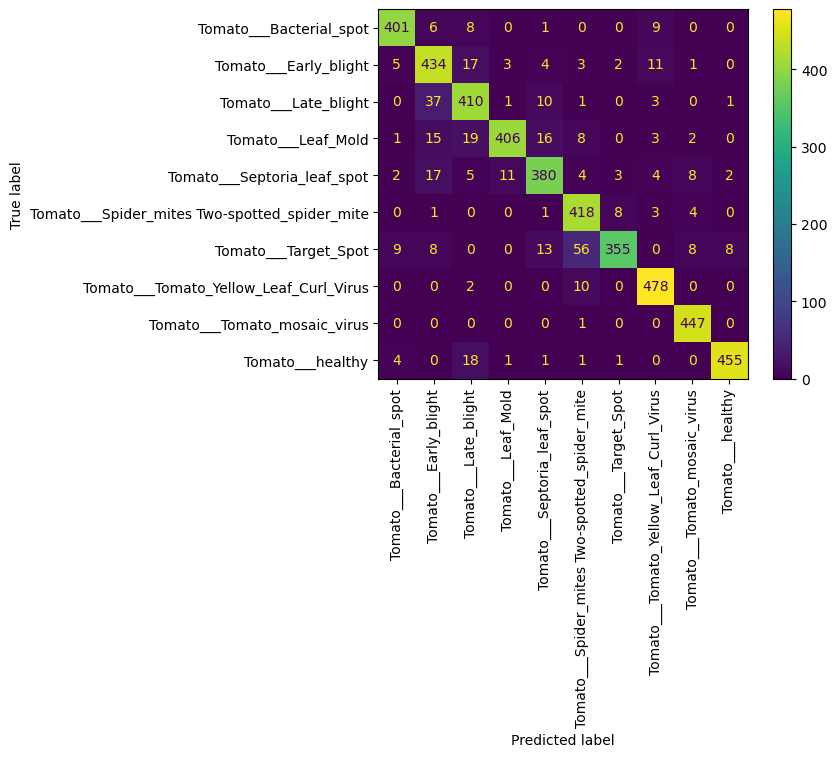

In [30]:
#Karmaşıklık matriksi
cm=confusion_matrix(test_actual,cnnpred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# VGG16 Modelimizi kullanarak tahmin

In [31]:
from keras_preprocessing.image import load_img

img_path = f'C:/Users/YekHam/YapayZeka_Proje/Tomato disease/validation/Tomato___Septoria_leaf_spot/3c70a1cb-bb92-4bf1-a742-0622d1616003___Keller.St_CG 1915.JPG'
img = tf.keras.utils.load_img(img_path,target_size = (224,224)) 
img = tf.keras.utils.img_to_array(img) / 255 
img = np.expand_dims(img,axis=0) 
prediction = modelvgg16.predict(img) 
labels[prediction.argmax()] 

1/1 [==============================] - 0s 180ms/step


'Tomato___Septoria_leaf_spot'

In [32]:
#Modelimizi kaydediyoruz
modelvgg16.save('YektaHamit_Pektaş_VGG16_RF.h5')

VGG16 MODEL: https://drive.google.com/file/d/1zEBAzvT6tTPLrr4j2wy_KN4wPt0sdQUW/view?usp=sharing

# Model kıyaslaması

In [33]:
results = pd.DataFrame({
    'Model': ['Convolutional Neural Network','VGG-16 Model'],
    'Score': [cnn_acc,vgg16_acc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(2)

,Model
Score,
91.25,Convolutional Neural Network
90.67,VGG-16 Model
